In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("../../dataset/df_cleaned_1atc.tsv", sep="\t")
df["atc_level2"] = df["atc_code"].str[:3]
df["drug_era_start_date"] = pd.to_datetime(df["drug_era_start_date"])
df["drug_era_end_date"] = pd.to_datetime(df["drug_era_end_date"])
df.head()

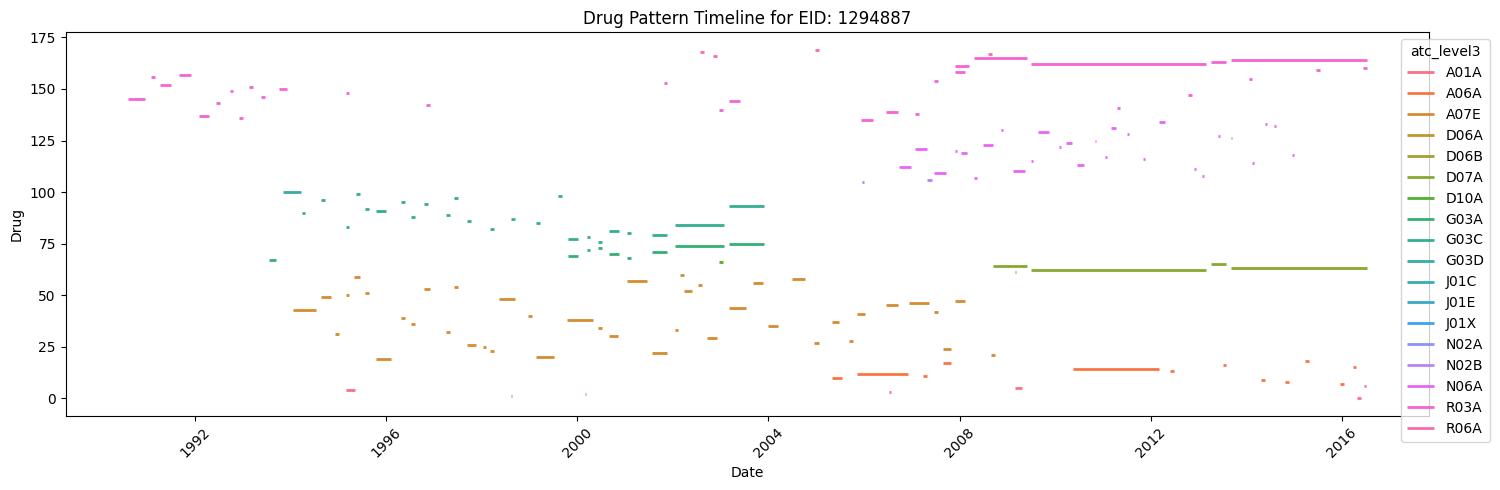

In [83]:
def plot_pattern(eid_df: pd.DataFrame, atc_level_col: str):
    assert atc_level_col in ["atc_level2", "atc_level3"]

    # Create figure
    plt.figure(figsize=(15, 5))

    # Get unique ATC codes for color mapping
    unique_atc = eid_df[atc_level_col].unique()
    color_palette = sns.color_palette("husl", n_colors=len(unique_atc))
    color_dict = dict(zip(unique_atc, color_palette))

    # Plot horizontal lines for each drug era
    for idx, row in eid_df.iterrows():
        plt.hlines(
            y=idx,
            xmin=row["drug_era_start_date"],
            xmax=row["drug_era_end_date"],
            colors=color_dict[row[atc_level_col]],
            linewidth=2,
            label=row[atc_level_col],
        )

    # Remove duplicate labels
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(
        by_label.values(),
        by_label.keys(),
        title=atc_level_col,
        bbox_to_anchor=(1.05, 1),
    )

    # Customize plot
    plt.title(f'Drug Pattern Timeline for EID: {eid_df["eid"].iloc[0]}')
    plt.xlabel("Date")
    plt.ylabel("Drug")

    # Rotate x-axis dates for better readability
    plt.xticks(rotation=45)

    # Adjust layout to prevent label cutoff
    plt.tight_layout()


eids = np.random.choice(df["eid"].unique(), 10)
eid_df = df[df["eid"] == eids[0]].sort_values(by="atc_code").reset_index(drop=True)
plot_pattern(eid_df, "atc_level3")